# Cross-validation

To evaluate generalizability, GGML can be cross-validated across train-test-splits using <code><a href="../generated/ggml_ot.train_test.html">ggml_ot.train_test()</a></code>. 

As before, we load the AnnData file and filter highly variable genes to speed up computations for the tutorial.

In [1]:
import ggml_ot
import scanpy as sc

id = "c1f6034b-7973-45e1-85e7-16933d0550bc.h5ad"
adata = ggml_ot.data.load_cellxgene(id)
sc.pp.highly_variable_genes(adata,n_top_genes=5000,subset=True)
dataset = ggml_ot.from_anndata(adata)

## Cross-validation with `train_test()`

By default, the <code><a href="../generated/ggml_ot.train_test.html">train_test()</a></code> function evaluates the following classification and clustering measures:
- k-NN classification accuracy
- Adjusted Rand Index (ARI)
- Normalized Mutual Information (NMI)
- Variation of Information (VI)

The output can be plotted for each split (by default `plot_split=True`) and outputted as a formatted table (by default `print_table=True`).

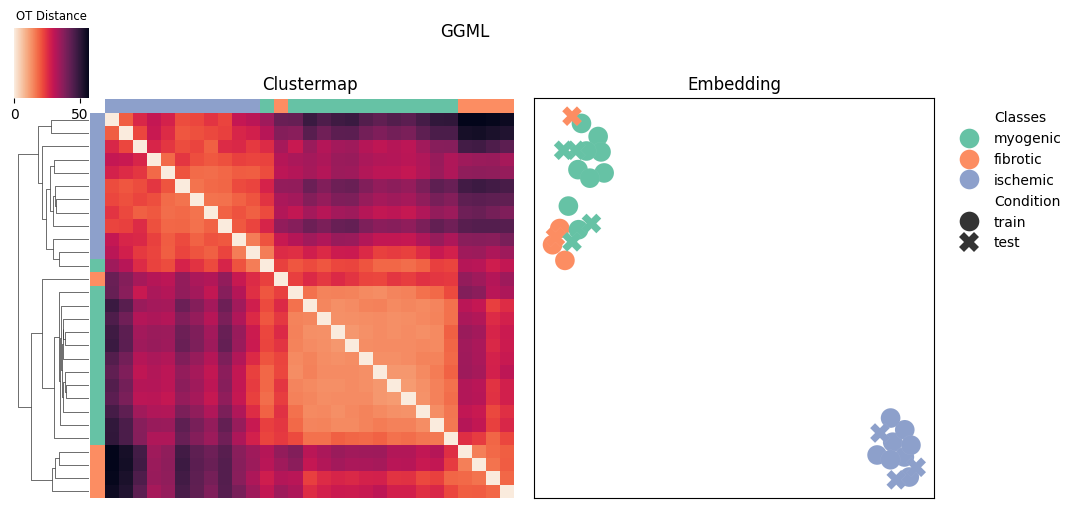

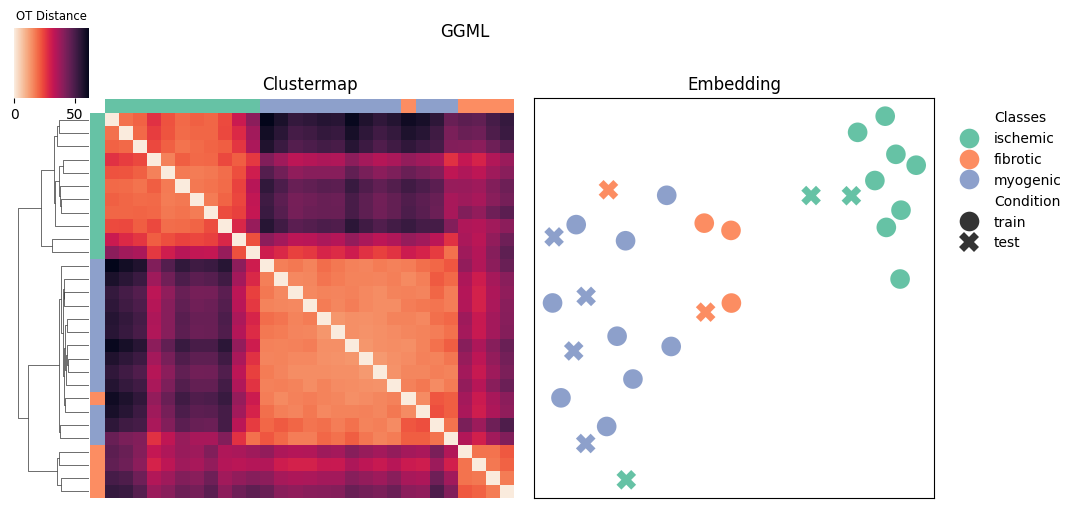

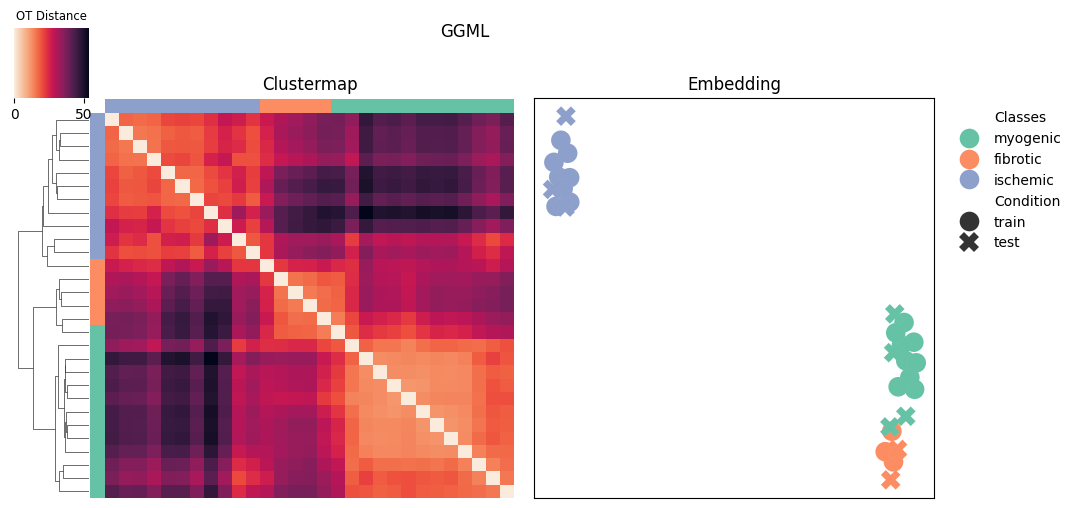

In [2]:
Ws, scores  = dataset.train_test(
    reg_type=1, max_iter=3, train_size=0.7, test_size=0.3, n_splits=3
)

It also returns the best performing trained ground_metric `w_theta` (if `return_dataset` is not set to True). We can test how well this specific metric that was learned on one train split performs across all test-train-splits.

Train/Test Splits:   0%|          | 0/5 [00:00<?, ?it/s]

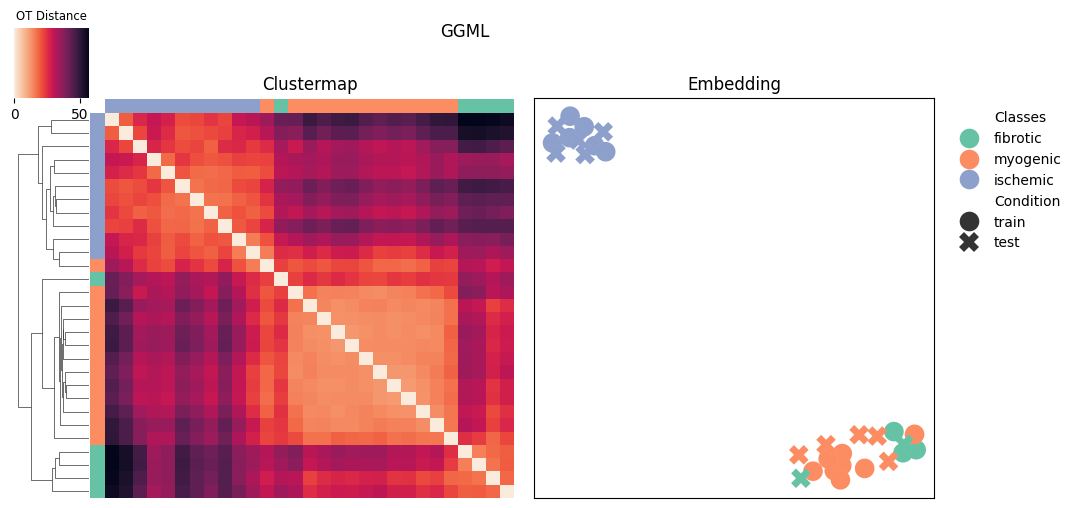

Train/Test Splits:  20%|██        | 1/5 [00:53<03:33, 53.39s/it]

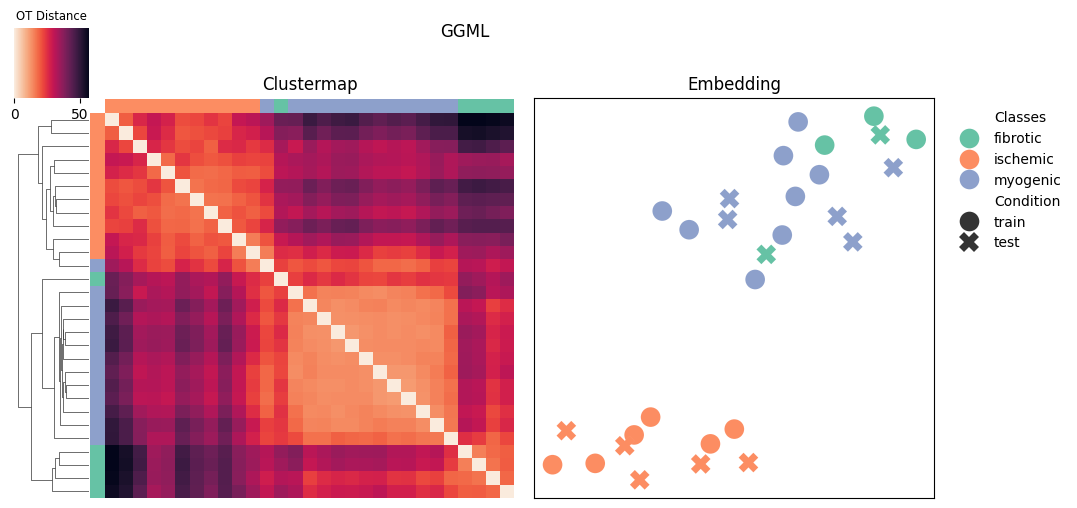

Train/Test Splits:  40%|████      | 2/5 [01:47<02:41, 53.92s/it]

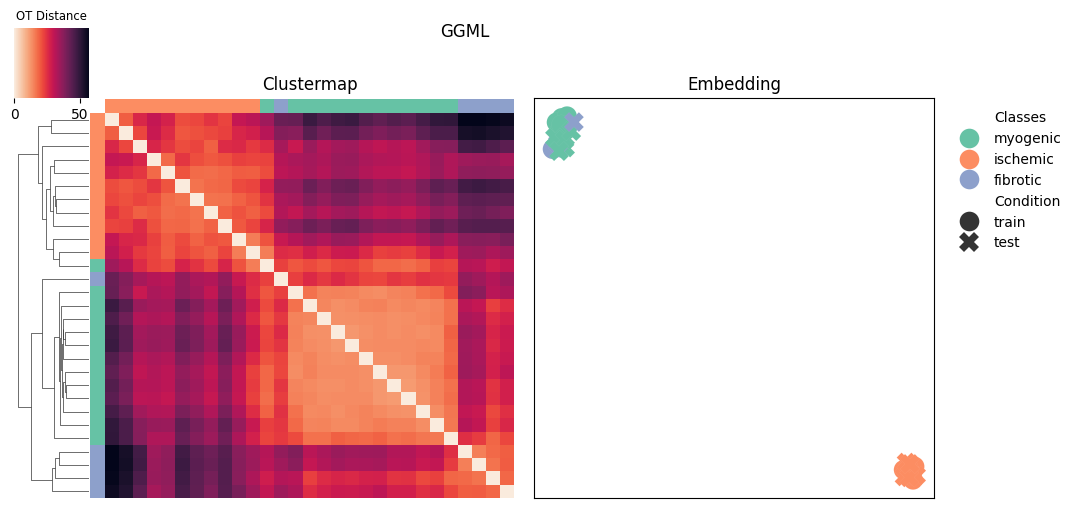

Train/Test Splits:  60%|██████    | 3/5 [02:39<01:45, 52.99s/it]

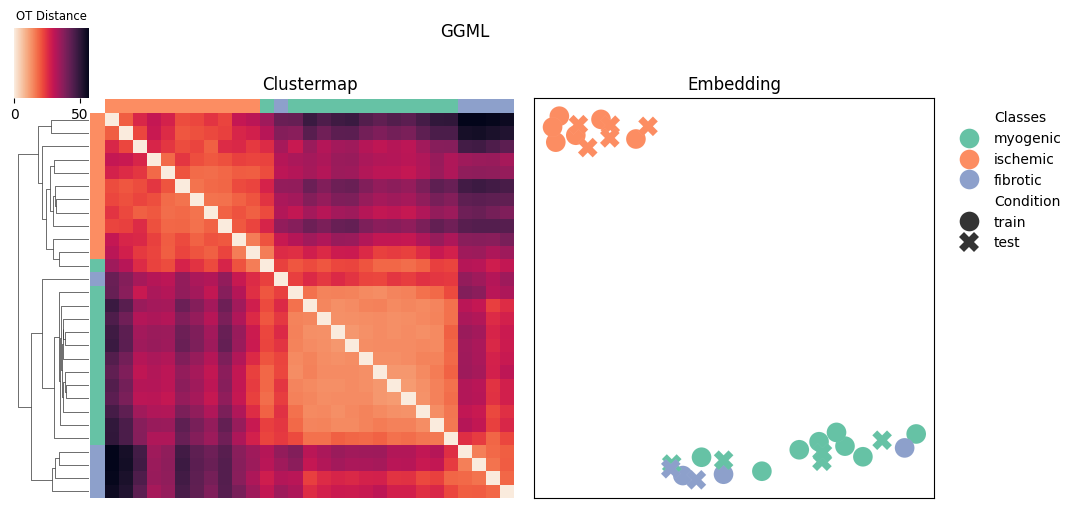

Train/Test Splits:  80%|████████  | 4/5 [03:32<00:53, 53.01s/it]

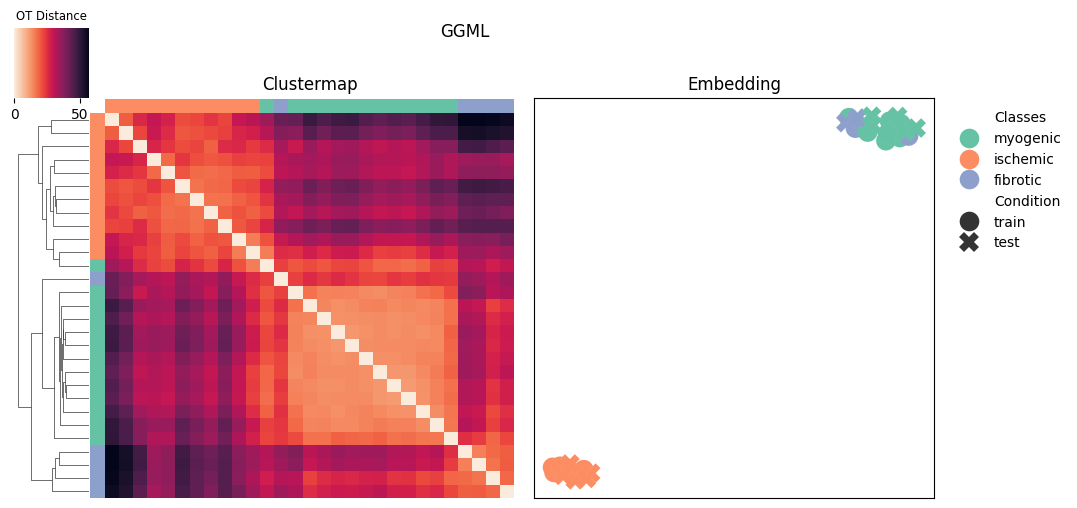

Train/Test Splits: 100%|██████████| 5/5 [04:23<00:00, 52.75s/it]


In [3]:
scores = ggml_ot.test(dataset, Ws["best"], n_splits=5, n_threads=32)